#**Estructurando un Proyecto de DS (parte II)**

### **Introducción a los dataset:**

> Cuento con 3 datasets que tienen una relación con varias llaves primarias. Los Datasets muestran el rendimiento en ventas en diferentes mercados de varios videojuegos, así como los reviews en Vandal (sitio especializado en videojuegos), y las ventas de cada consola.


### **Motivación:**

> En la industria de los videojuegos, el éxito de un nuevo lanzamiento puede ser determinante para el crecimiento y la rentabilidad de una empresa de desarrollo. Con la creciente competencia y la evolución constante de la tecnología, es esencial tomar decisiones informadas sobre qué tipo de videojuego desarrollar y en qué plataforma lanzarlo. Por lo tanto, surge la necesidad de analizar y predecir la posible performance de la salida de un nuevo videojuego en un mercado específico.
> El objetivo de este análisis es proporcionar a las empresas desarrolladoras de videojuegos una herramienta que les permita evaluar el potencial de éxito de sus futuros lanzamientos antes de invertir recursos significativos en su desarrollo. Al comprender mejor las variables que influyen en las ventas de videojuegos, las empresas pueden tomar decisiones estratégicas más acertadas y maximizar su retorno de inversión.

### **Audiencia:**

> La audiencia objetivo de este análisis son los **gerentes y tomadores de decisiones** en las empresas desarrolladoras de videojuegos. Esto incluye a los ejecutivos de nivel gerencial y estratégico, así como a los directores de marketing y desarrollo de productos. Estos profesionales son responsables de definir la estrategia de lanzamiento, incluyendo la selección de la plataforma de juego, el género del juego, la inversión en marketing y otros aspectos clave.
>Al proporcionar a esta audiencia una herramienta que les permita tomar decisiones más fundamentadas y respaldadas por datos, estamos contribuyendo a la capacidad de la industria de los videojuegos para adaptarse a un mercado en constante evolución y aumentar sus posibilidades de éxito en un entorno altamente competitivo.

In [ ]:
# Instalamos libraries necesarias:

! pip install chart_studio
! pip install bqplot
! pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=24896e786a381a66d7774518639c8a28cf3c70bf1658c2de04ea87f195afbbfb
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import chart_studio.plotly as py
import os
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)

#**Carga y descripción de Datasets**
##Primer dataframe de la serie: **games**

In [ ]:
from google.colab import drive

games = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/vgsales_cln.xlsx')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
4,5,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [ ]:
# Princiapl información del dataset
print('Estructura de dataFrame:', games.shape)
games.info()

Estructura de dataFrame: (3768, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768 entries, 0 to 3767
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          3768 non-null   int64  
 1   Name          3768 non-null   object 
 2   Platform      3768 non-null   object 
 3   Year          3768 non-null   int64  
 4   Genre         3768 non-null   object 
 5   Publisher     3768 non-null   object 
 6   NA_Sales      3768 non-null   float64
 7   EU_Sales      3768 non-null   float64
 8   JP_Sales      3768 non-null   float64
 9   Other_Sales   3768 non-null   float64
 10  Global_Sales  3768 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 323.9+ KB


In [ ]:
# Describimos el dataset
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,3768.000000,3768.000000,3768.000000,3768.000000,3768.000000,3768.000000,3768.000000
mean,1884.500000,2008.532113,0.472710,0.310332,0.089196,0.106038,0.978426
std,1087.872235,4.792706,1.209768,0.860273,0.343464,0.346039,2.483122
min,1.000000,1981.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,942.750000,2005.000000,0.050000,0.020000,0.000000,0.010000,0.130000
50%,1884.500000,2009.000000,0.160000,0.090000,0.000000,0.030000,0.370000
75%,2826.250000,2012.000000,0.450000,0.290000,0.040000,0.090000,0.940000
max,3768.000000,2016.000000,41.490000,29.020000,6.500000,10.570000,82.740000


##Segundo dataframe de la serie: **consoles**

In [ ]:
consoles = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/cgsales_clean.xlsx')
consoles.head()

,Platform_detail,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,PlayStation 2,PS2,53.65,55.28,23.18,26.59,158.70
1,Nintendo DS,DS,57.92,51.84,32.99,11.28,154.02
2,Nintendo Switch,NS,44.60,31.56,28.71,19.04,123.91
3,Game Boy,GB,43.18,40.05,32.47,2.99,118.69
4,PlayStation 4,PS4,38.14,45.83,9.61,23.43,117.02


In [ ]:
# Princiapl información del dataset
print('Estructura de dataFrame:', consoles.shape)
consoles.info()

Estructura de dataFrame: (83, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform_detail  83 non-null     object 
 1   Platform         83 non-null     object 
 2   NA_Sales         83 non-null     float64
 3   EU_Sales         83 non-null     float64
 4   JP_Sales         83 non-null     float64
 5   Other_Sales      83 non-null     float64
 6   Global_Sales     83 non-null     float64
dtypes: float64(5), object(2)
memory usage: 4.7+ KB


In [ ]:
# Describimos el dataset
consoles.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,83.000000,83.000000,83.000000,83.000000,83.000000
mean,8.711566,6.112771,3.969398,2.364337,21.540241
std,15.479677,12.685399,7.996044,5.368374,38.964424
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.165000
50%,0.000000,0.000000,0.030000,0.000000,1.500000
75%,12.000000,5.090000,3.285000,0.965000,21.545000
max,57.920000,55.280000,32.990000,26.590000,158.700000


##Tercer dataframe de la serie: **vandal**

In [ ]:
vandal = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/vandal_coment_clean.xlsx')
vandal.head()

,Game_ID,Game,Platform_detail,Platform,website_rating,user_rating,release,year,developer,classification,preview,url
0,007Racing_PS,007 Racing,PlayStation,PS,6.9,4.88,2001-01-01,2001,EA Games & Electronic Arts,NaN,"Bond, James BondCon la reciente tirada de titu...",NaN
1,007:QuantumofSolace_X360,007: Quantum of Solace,Xbox 360,X360,7.1,6.58,2008-11-07,2008,Activision,PEGI +16,James Bond nunca ha dejado de estar presente e...,https://vandal.elespanol.com/analisis/x360/007...
2,007:QuantumofSolace_PS3,007: Quantum of Solace,PlayStation 3,PS3,7.1,6.97,2008-11-07,2008,Activision,PEGI +16,James Bond nunca ha dejado de estar presente e...,https://vandal.elespanol.com/analisis/x360/007...
3,007:QuantumofSolace_Wii,007: Quantum of Solace,Nintendo Wii,Wii,0.0,7.50,2008-11-07,2008,Activision,PEGI +16,James Bond nunca ha dejado de estar presente e...,https://vandal.elespanol.com/analisis/x360/007...
4,300:MarchtoGlory_PSP,300: March to Glory,PlayStation Portable,PSP,6.5,7.24,2007-03-30,2007,Collision Studios & Warner Bros.,PEGI +18,"Sin duda, uno de los estrenos de cine mas espe...",https://vandal.elespanol.com/analisis/psp/300-...


In [ ]:
# Princiapl información del dataset
print('Estructura de dataFrame:', vandal.shape)
vandal.info()

Estructura de dataFrame: (3998, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Game_ID          3998 non-null   object        
 1   Game             3998 non-null   object        
 2   Platform_detail  3998 non-null   object        
 3   Platform         3998 non-null   object        
 4   website_rating   3998 non-null   float64       
 5   user_rating      3998 non-null   float64       
 6   release          3998 non-null   datetime64[ns]
 7   year             3998 non-null   int64         
 8   developer        3998 non-null   object        
 9   classification   3112 non-null   object        
 10  preview          3997 non-null   object        
 11  url              3673 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 374.9+ KB


In [ ]:
# Describimos el dataset
vandal.describe()

,website_rating,user_rating,year
count,3998.000000,3998.000000,3998.000000
mean,6.548337,7.210955,2009.298149
std,3.146234,2.105616,4.544738
min,0.000000,0.000000,1995.000000
25%,6.200000,6.840000,2006.000000
50%,7.800000,7.700000,2009.000000
75%,8.600000,8.370000,2013.000000
max,10.000000,10.000000,2019.000000


In [ ]:
#Nos encontramos con datos nulos, indicados con 0. En este dataset el valor 0 en 'website_rating' y 'user_rating', indica que no existe valoración para ese título
num_missing_vandal = (vandal[['Game_ID',	'Game',	'Platform_detail',	'Platform', 'website_rating',	'user_rating',	'release',	'developer',	'classification',	'preview',	'url', 'year']] == 0).sum()
num_missing_vandal

Game_ID              0
Game                 0
Platform_detail      0
Platform             0
website_rating     676
user_rating        217
release              0
developer            0
classification       0
preview              0
url                  0
year                 0
dtype: int64

In [ ]:
# Reemplazamos los 0 por NaN, con el objetivo de filtrarlo en el análisis y así excluirlos para obtener datos de media más limpios
vandal[['Game_ID',	'Game',	'Platform_detail',	'Platform', 'website_rating',	'user_rating',	'release',	'developer',	'classification',	'preview',	'url', 'year']] = vandal[['Game_ID',	'Game',	'Platform_detail',	'Platform', 'website_rating',	'user_rating',	'release',	'developer',	'classification',	'preview',	'url', 'year']].replace(0, np.nan)
vandal[['Game_ID',	'Game',	'Platform_detail',	'Platform', 'website_rating',	'user_rating',	'release',	'developer',	'classification',	'preview',	'url', 'year']].head()

,Game_ID,Game,Platform_detail,Platform,website_rating,user_rating,release,developer,classification,preview,url,year
0,007Racing_PS,007 Racing,PlayStation,PS,6.9,4.88,2001-01-01,EA Games & Electronic Arts,NaN,"Bond, James BondCon la reciente tirada de titu...",NaN,2001
1,007:QuantumofSolace_X360,007: Quantum of Solace,Xbox 360,X360,7.1,6.58,2008-11-07,Activision,PEGI +16,James Bond nunca ha dejado de estar presente e...,https://vandal.elespanol.com/analisis/x360/007...,2008
2,007:QuantumofSolace_PS3,007: Quantum of Solace,PlayStation 3,PS3,7.1,6.97,2008-11-07,Activision,PEGI +16,James Bond nunca ha dejado de estar presente e...,https://vandal.elespanol.com/analisis/x360/007...,2008
3,007:QuantumofSolace_Wii,007: Quantum of Solace,Nintendo Wii,Wii,NaN,7.50,2008-11-07,Activision,PEGI +16,James Bond nunca ha dejado de estar presente e...,https://vandal.elespanol.com/analisis/x360/007...,2008
4,300:MarchtoGlory_PSP,300: March to Glory,PlayStation Portable,PSP,6.5,7.24,2007-03-30,Collision Studios & Warner Bros.,PEGI +18,"Sin duda, uno de los estrenos de cine mas espe...",https://vandal.elespanol.com/analisis/psp/300-...,2007


In [ ]:
# Comprobación de eliminación de datos incoherentes en el modelo
num_missing_vandal = (vandal[['Game_ID',	'Game',	'Platform_detail',	'Platform', 'website_rating',	'user_rating',	'release',	'developer',	'classification',	'preview',	'url', 'year']] == 0).sum()
num_missing_vandal

Game_ID            0
Game               0
Platform_detail    0
Platform           0
website_rating     0
user_rating        0
release            0
developer          0
classification     0
preview            0
url                0
year               0
dtype: int64

#Proyecto: **hipótesis y visualizaciones**

##**Contexto analítico:**
> Los modelos a analizar en este estudio tienen como objetivo proporcionar insights valiosos a partir de los datos recopilados en el dataset de videojuegos. Se centrarán en tres escenarios cruciales que abordarán tanto las valoraciones de usuarios como las métricas comerciales.

Estos escenarios son los siguientes:

1. Predicción de Ventas: Uno de los principales objetivos analíticos es predecir las ventas de un videojuego antes de su lanzamiento. Utilizando técnicas de análisis predictivo y aprendizaje automático, se buscará comprender qué factores influyen en las ventas y cómo se pueden utilizar para estimar el potencial de éxito de un juego.

2. Análisis de Valoraciones de Usuarios: Las opiniones de los usuarios son fundamentales en la industria de los videojuegos. Se llevará a cabo un análisis de sentimiento para evaluar las opiniones de los usuarios en torno a los juegos. Esto permitirá identificar patrones en las reseñas y entender cómo afectan a las ventas y al éxito general del juego.


>Al abordar estos dos escenarios clave, este análisis proporcionará a las empresas de desarrollo de videojuegos una visión más completa y precisa de cómo sus juegos pueden funcionar en el mercado. Estos insights permitirán tomar decisiones más informadas sobre el desarrollo, la comercialización y la estrategia de lanzamiento, en última instancia, maximizando las posibilidades de éxito en una industria dinámica y competitiva.


## **Relación entre Valoraciones de Usuarios y Valoraciones de Vandal:**

¿Existe una correlación entre las valoraciones de usuarios y las valoraciones de Vandal? En otras palabras, ¿Las valoraciones de Vandal podrían afectar a las valoraciones de los usuarios?

Para este análisis vamos a explorar el dataset 'vandal'.

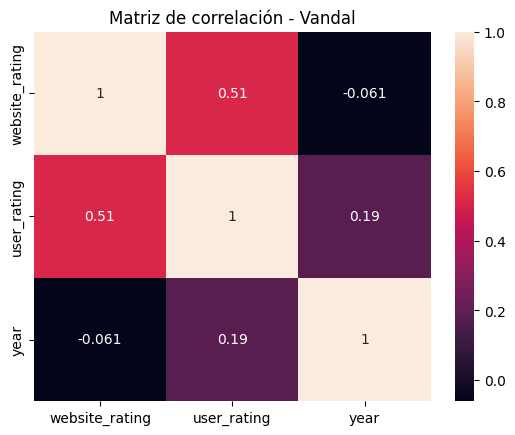

In [ ]:
#Matriz de correlación en el dataset Vandal
correlation_matrix = vandal.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de correlación - Vandal')
plt.show()

Podemos observar que existe una correlación, no muy fuerte, entre user_rating y website_rating, vamos a analizarlo más a fondo:

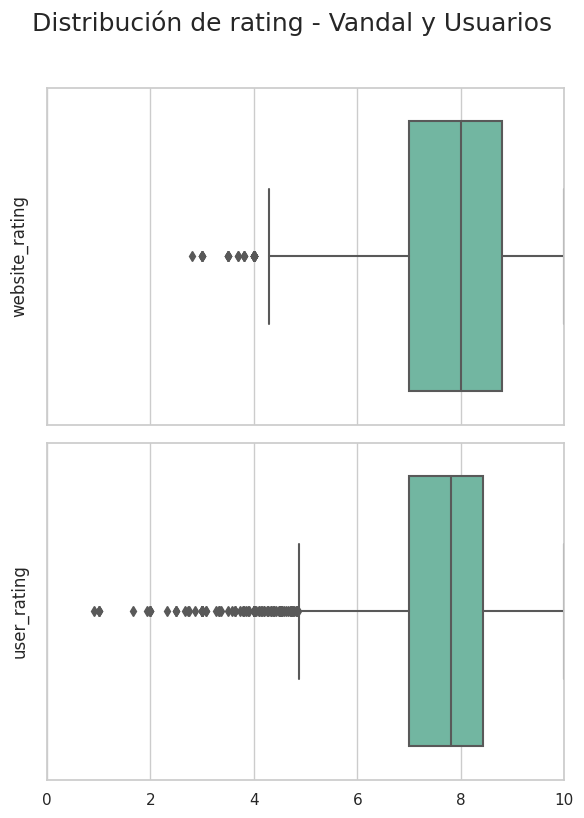

In [ ]:
# Primero vamos a conocer como se componen ambas variables. Para esto generamos un gráfico de boxplot para detectar outliers y la media

# Lista de columnas que queremos filtrar
datos_rating = ['website_rating', 'user_rating']
datos_filtrados = vandal[datos_rating]

# Crear subplots con ejes compartidos
sns.set(style="whitegrid", font_scale=1)
fig, axs = plt.subplots(nrows=len(datos_rating), figsize=(6, 8), sharex=True)

for indice, col in enumerate(datos_rating):
    sns.boxplot(x=datos_filtrados[col], ax=axs[indice], palette="Set2")
    axs[indice].set_xlabel("")
    axs[indice].set_xlim(0, 10)

    if indice >= 0 :
        axs[indice].set_ylabel(col)

plt.suptitle('Distribución de rating - Vandal y Usuarios', y=1.02, fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
# Análisis numérico
print('User Rating:\nLa media de user_rating es: ',round(vandal['user_rating'].mean(),2))
print('La mediana de user_rating es: ',round(vandal['user_rating'].median(),2))
print('La moda de user_rating es: ',round(vandal['user_rating'].mode(),2))
print('El valor mínimo es de: ', vandal['user_rating'].min())
print('El valor máximo es de: ', vandal['user_rating'].max())

print('\nWebsite Rating:\nLa media de website_rating es: ',round(vandal['website_rating'].mean(),2))
print('La mediana de website_rating es: ',round(vandal['website_rating'].median(),2))
print('La moda de website_rating es: ',round(vandal['website_rating'].mode(),2))
print('El valor mínimo es de: ', vandal['website_rating'].min())
print('El valor máximo es de: ', vandal['website_rating'].max())

User Rating:
La media de user_rating es:  7.62
La mediana de user_rating es:  7.8
La moda de user_rating es:  0    10.0
Name: user_rating, dtype: float64
El valor mínimo es de:  0.9
El valor máximo es de:  10.0

Website Rating:
La media de website_rating es:  7.88
La mediana de website_rating es:  8.0
La moda de website_rating es:  0    8.0
Name: website_rating, dtype: float64
El valor mínimo es de:  2.8
El valor máximo es de:  10.0


###**En primera instancia nos encontramos con varios insights:**

La columna user_rating cuenta con un espectro más amplio, abarcando datos entre 0.9 y 10, contando con mayor cantidad de outliers.

En cambio, la columna website_rating cuentacon un espectro más corto. Observamos que no existe una nota menor a 2.8, siendo esta su peor calificación.

Ahora, en otro aspecto, vemos que la media de ambos es bastante similar, por lo que podemos pensar en una primera hipótesis que se desprende: los puntajes de lo usuarios son más extremos que los valores de Vandal.

*Más adelante buscaremos comprobarlo.*

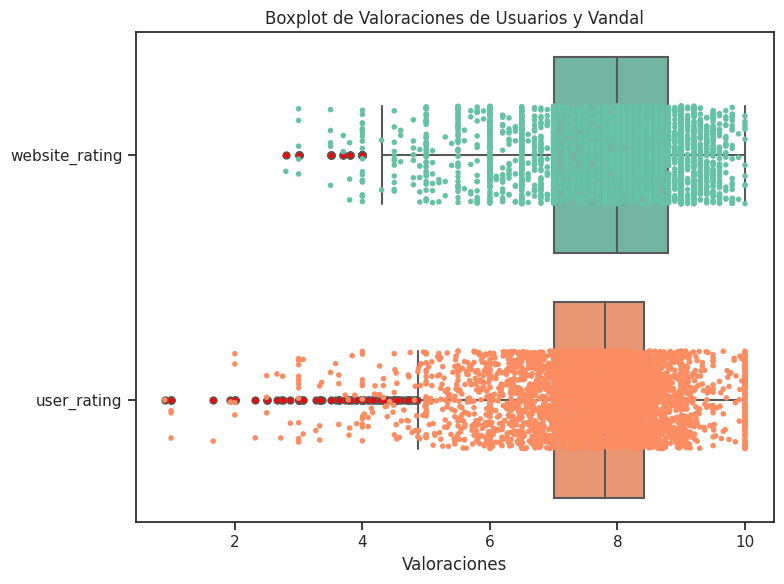

In [ ]:
# Para ahondar en el análisis, generamos el boxplot, sumando un stripplot, para ver cuánta cantidad de datos se concentran en cada puntaje
datos_rating = ['website_rating', 'user_rating']
datos_filtrados = vandal[datos_rating]

plt.figure(figsize=(8, 6))
sns.boxplot(data=datos_filtrados, palette="Set2", orient="h", showfliers=True, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 5})

# Utilizar un stripplot para mostrar los puntos de datos
sns.stripplot(data=datos_filtrados, palette="Set2", orient="h", jitter=0.2, size=4)

plt.xlabel("Valoraciones")
plt.title("Boxplot de Valoraciones de Usuarios y Vandal")
plt.tight_layout()
pip install ptitprince
plt.show()

Ya con esto observamos como la mayor cantidad de de valoraciones en *user_rating* los outliers no representan gran cantidad de valores, como se podía pensar en la hipótesis anterior. Se observa como los datos son poco representativos en cantidad, respecto de la media, así como tambiéen se observa que la mayor conglomeración de datos se produce en torno a los 8 puntos.

In [ ]:
# Una vez generado el análisis, continuamos con un análisis de distribución de los datos

from bokeh.palettes import Spectral6
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
import pandas as pd
import numpy as np
from scipy.stats import norm

output_notebook()

vandal_cleaned = vandal.dropna(subset=['website_rating', 'user_rating'])

# Crear un histograma de las variables 'website_rating' y 'user_rating'
p = figure(title="Distribución de Ratings de Usuarios y Vandal", x_axis_label="Rating", y_axis_label="Frecuencia")

# Crear un histograma para 'user_rating'
hist2, edges2 = np.histogram(vandal_cleaned['user_rating'], bins=10)
source2 = ColumnDataSource(data=dict(top=hist2, left=edges2[:-1], right=edges2[1:]))
p.quad(top='top', bottom=0, left='left', right='right', source=source2, line_color='', legend_label="User Rating", fill_color=Spectral6[1], fill_alpha=0.7)

# Crear un histograma para 'website_rating'
hist1, edges1 = np.histogram(vandal_cleaned['website_rating'], bins=10)
source1 = ColumnDataSource(data=dict(top=hist1, left=edges1[:-1], right=edges1[1:]))
p.quad(top='top', bottom=0, left='left', right='right', source=source1, line_color="", legend_label="Website Rating", fill_color=Spectral6[0], fill_alpha=0.3) # El error observado se debe al line_color, el cual dejo vacío para que no se muestre en ningún color

# Calcular línea de tendenciapara 'user_rating'
x2 = np.linspace(min(vandal_cleaned['user_rating']), max(vandal_cleaned['user_rating']), 100)
mu2, std2 = norm.fit(vandal_cleaned['user_rating'])
y2 = norm.pdf(x2, mu2, std2) * len(vandal_cleaned)

# Agregar línea de tendencia para 'user_rating'
p.line(x2, y2, line_color="green", legend_label="User Rating Trend", line_width=1)

# Calcular línea de tendencia 'website_rating'
x1 = np.linspace(min(vandal_cleaned['website_rating']), max(vandal_cleaned['website_rating']), 100)
mu1, std1 = norm.fit(vandal_cleaned['website_rating'])
y1 = norm.pdf(x1, mu1, std1) * len(vandal_cleaned)

# Agregar línea de tendencia para 'website_rating'
p.line(x1, y1, line_color="blue", legend_label="Website Rating Trend", line_width=1)

p.legend.title = "Ratings"
p.legend.label_text_font_size = "10px"
p.legend.location = "top_left"
p.add_tools(HoverTool(tooltips=[("Rating", "@top"), ("Intervalo", "(@left, @right)")]))

show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : line_color='' [no close matches] {renderer: GlyphRenderer(id='p1263', ...)}
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : line_color='' [no close matches] {renderer: GlyphRenderer(id='p1249', ...)}


Viendo la distribución, asumimos que tiende a ser normal. A su vez la kurtosis en user_rating se presume mayor a la que tendría website_rating, en consistencia con lo mostrado en el stripplot anterior.



### **Una vez analizadas la distribución de los datos, generamos un análisis de correlación entre las valoraciones de usuarios y de Vandal**

Para esto vamos a comparar mediante un regplot y una regresión lineal de los datos.

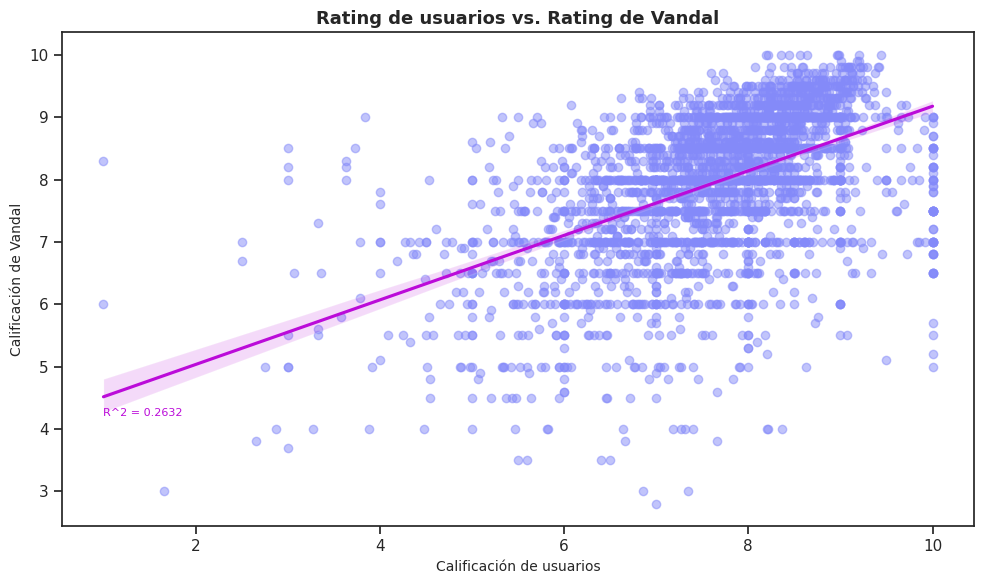

In [ ]:
user_rating_vandal = vandal['user_rating']
website_rating_vandal = vandal['website_rating']

# Creación del gráfico de correlación en seaborn
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 6))
sns.regplot(x=user_rating_vandal, y=website_rating_vandal,scatter_kws={'alpha':0.5, 'color':'#848AF9'}, line_kws={'color':'#BB0BD9'})

from scipy.stats import linregress

# Filtrar datos válidos
valid_indices = ~np.isnan(user_rating_vandal) & ~np.isnan(website_rating_vandal)
x_valid = user_rating_vandal[valid_indices]
y_valid = website_rating_vandal[valid_indices]

# Calcular la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x_valid, y_valid)

# Calcular R^2
r_squared = r_value**2
texto = r'R^2 = {}'.format(round(r_squared, 4))

# Cálculo de línea de tendencia con numpy
z = np.polyfit(x_valid, y_valid, 1)
p = np.poly1d(z)

# Etiquetas y título
plt.xlabel('Calificación de usuarios', fontsize=10)
plt.ylabel('Calificación de Vandal', fontsize=10)
plt.title('Rating de usuarios vs. Rating de Vandal', fontsize=13, fontweight='bold')

# Mostrar resultado
plt.text(1, 4.2, texto, fontsize = 8, color = '#BB0BD9')
plt.tight_layout()
plt.show()

In [ ]:
# Por último generamos un análisis del modelo, buscando que otros datos podrían servirnos para convalidar la correlación

import statsmodels.api as sm
import statsmodels.formula.api as smf


model = 'website_rating~user_rating + developer'
#Ajuste de los datos
lm4    = smf.ols(formula = model, data = vandal).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:         website_rating   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     3.978
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          2.47e-158
Time:                        11:55:52   Log-Likelihood:                -3070.7
No. Observations:                3106   AIC:                             8339.
Df Residuals:                    2007   BIC:                         1.498e+04
Df Model:                        1098                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [ ]:
# Test de hipóotesis:
# H0: los puntajes de los usuarios están influenciados por los puntajes de Vandal
# Configurar el nivel de significancia al 95% (alfa = 0.05)
alfa = 0.05

# Realizar la prueba de hipótesis
T, p = stats.ttest_1samp(x_valid, popmean=7.88)

# Calcular el valor p unilateral
p_value = p / 2

# Comprobar si rechazamos la hipótesis nula
if p_value < alfa:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

Rechazamos la hipótesis nula


# **Conclusión:**

En principio observamos en el cálculo del gráfico de regresión, en donde r^2 es < 0.27, por lo que no existe una correlación fuerte entre ambos datos.

Al calcular el modelo, vemos que existen datos dentro del dataset, que terminan siendo mucho más importantes para entender la relación. En este sentido, encuentro interesante analizar la variable 'developer', la cual refiere al estudio que desarrolla el videojuego.

**Por otro lado, conforme a lo observado por el test de hipótesis, con una confianza del 95%, podemos afirmar que no contamos con la evidencia suficiente para afirmar que la puntuación en Vandal afecta a la valoración final del usuario.**

## **¿Existe una relación entre las valoraciones del sitio Vandal y las ventas de juegos en Europa, Japón, USA o a nivel global?**

Voy a estar analizando la relación que existe entre los comentarios del sitio web Vandal, con las ventas en cada región para los videojuegos.



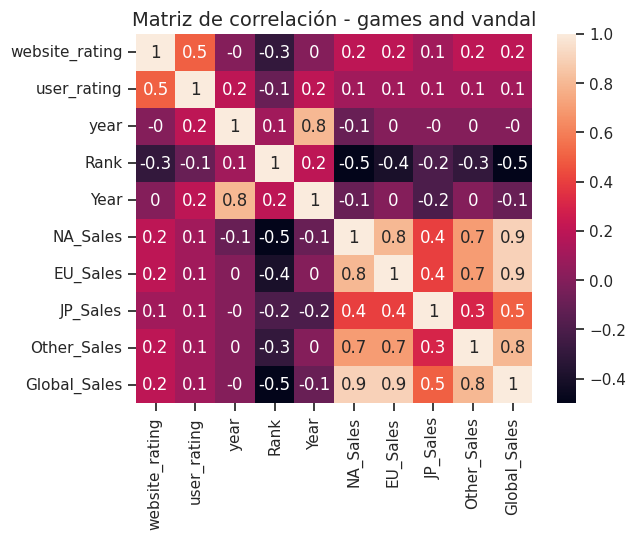

In [ ]:
# Matriz de correlación, análisis de datos numéricos
# Mergeamos los datos en una sola tabla
merged_data = pd.merge(vandal, games, left_on='Game', right_on='Name', how='inner')

# Calcular la matriz de correlación
correlation_matrix_games = merged_data.corr(numeric_only=True)

# Truncar los valores de la matriz de correlación a 1 decimal
correlation_matrix_games = correlation_matrix_games.round(1)

sns.heatmap(correlation_matrix_games, annot=True)
plt.title('Matriz de correlación - games and vandal', fontsize=14)
plt.show()

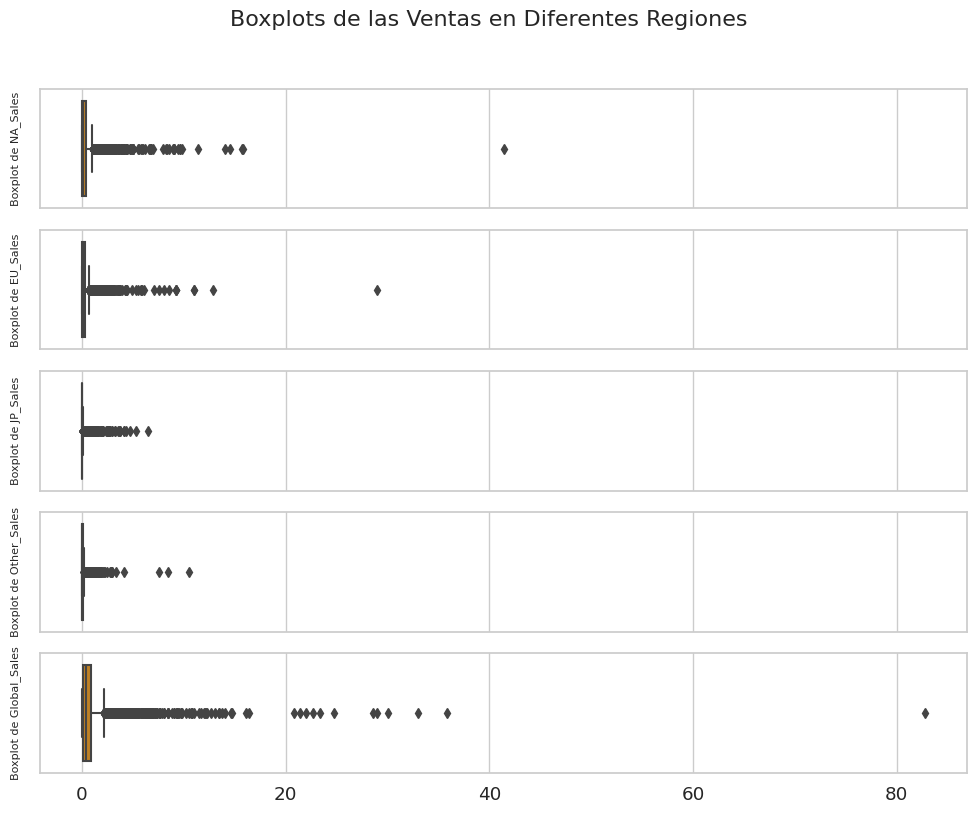

In [ ]:
# Análisis en un boxplot de la distribución de los datos de ventas:
eje_x_1 = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
datos_filtrados_1 = games[eje_x_1]

# Crear subplots con una disposición adecuada
sns.set(style="whitegrid", font_scale=1.2)
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 8), sharex=True)
y_range = (0, 5)

for indice, col in enumerate(eje_x_1, 1):
    sns.boxplot(x=col, data=datos_filtrados_1, color="#D9860B", ax=axs[indice - 1])
    axs[indice - 1].set_xlabel("")  # Eliminar label del eje X
    axs[indice - 1].set_ylabel(f'Boxplot de {col}', fontsize=8)

plt.suptitle('Boxplots de las Ventas en Diferentes Regiones', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

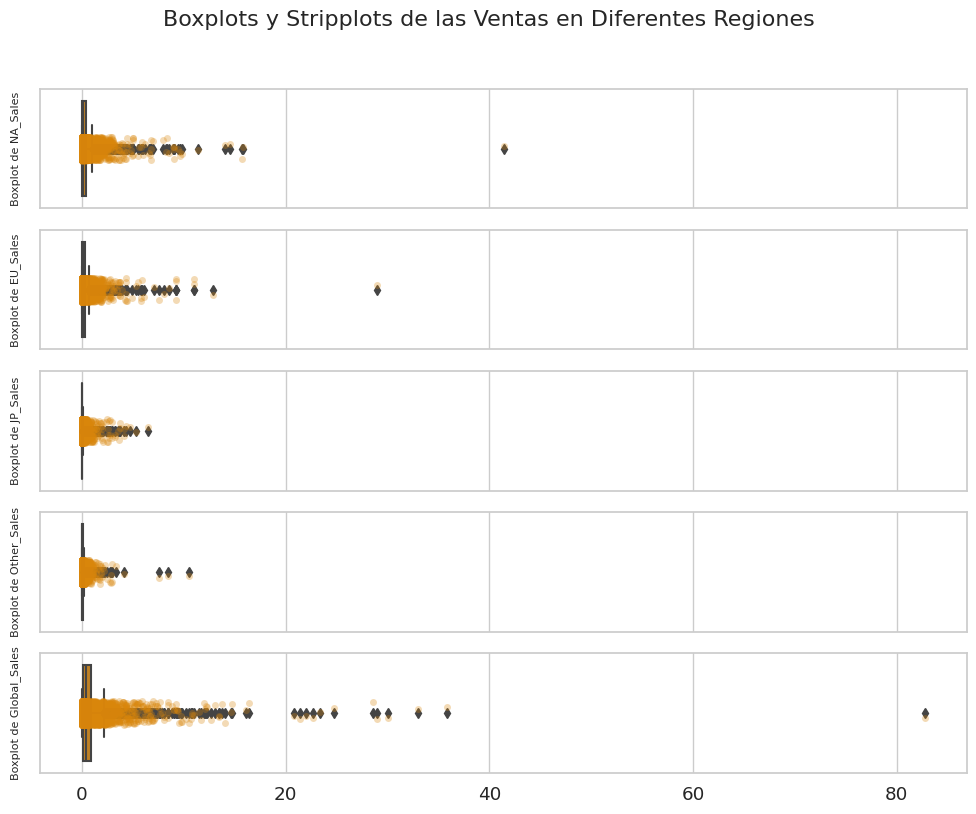

In [ ]:
# Generamos un stripplot para ver mejor la cantidad de outliers:
eje_x_1 = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
datos_filtrados_1 = games[eje_x_1]

sns.set(style="whitegrid", font_scale=1.2)
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 8), sharex=True)
y_range = (0, 5)

for indice, col in enumerate(eje_x_1, 1):
    sns.boxplot(x=col, data=datos_filtrados_1, color='#D9860B', ax=axs[indice - 1])

    # Agregar stripplot
    sns.stripplot(x=col, data=datos_filtrados_1, jitter=True, color="#D9860B", alpha=0.3, ax=axs[indice - 1])

    axs[indice - 1].set_xlabel("")  # Eliminar label del eje X para mejorar la vista
    axs[indice - 1].set_ylabel(f'Boxplot de {col}', fontsize=8)

plt.suptitle('Boxplots y Stripplots de las Ventas en Diferentes Regiones', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

### A priori vemos que existen muchos outliers en la mayoría de los datos de ventas analizados, por lo que la distribución va a ser un elemento dificil al momento de efectuar un análisis.

In [ ]:
# Análisis numérico

# Calcular medidas estadísticas para 'NA_Sales'
na_sales_mean = round(games['NA_Sales'].mean(), 2)
na_sales_median = round(games['NA_Sales'].median(), 2)
na_sales_mode = games['NA_Sales'].mode()[0]
na_sales_min = games['NA_Sales'].min()
na_sales_max = games['NA_Sales'].max()

# Calcular medidas estadísticas para 'JP_Sales'
jp_sales_mean = round(games['JP_Sales'].mean(), 2)
jp_sales_median = round(games['JP_Sales'].median(), 2)
jp_sales_mode = games['JP_Sales'].mode()[0]
jp_sales_min = games['JP_Sales'].min()
jp_sales_max = games['JP_Sales'].max()

# Calcular medidas estadísticas para 'EU_Sales'
eu_sales_mean = round(games['EU_Sales'].mean(), 2)
eu_sales_median = round(games['EU_Sales'].median(), 2)
eu_sales_mode = games['EU_Sales'].mode()[0]
eu_sales_min = games['EU_Sales'].min()
eu_sales_max = games['EU_Sales'].max()

# Calcular medidas estadísticas para 'Global_Sales'
global_sales_mean = round(games['Global_Sales'].mean(), 2)
global_sales_median = round(games['Global_Sales'].median(), 2)
global_sales_mode = games['Global_Sales'].mode()[0]
global_sales_min = games['Global_Sales'].min()
global_sales_max = games['Global_Sales'].max()

# Calcular medidas estadísticas para 'Other_Sales'
other_sales_mean = round(games['Other_Sales'].mean(), 2)
other_sales_median = round(games['Other_Sales'].median(), 2)
other_sales_mode = games['Other_Sales'].mode()[0]
other_sales_min = games['Other_Sales'].min()
other_sales_max = games['Other_Sales'].max()

# Imprimir las medidas estadísticas
print('NA_Sales:\nLa media de NA_Sales es:', na_sales_mean)
print('La mediana de NA_Sales es:', na_sales_median)
print('La moda de NA_Sales es:', na_sales_mode)
print('El valor mínimo es de:', na_sales_min)
print('El valor máximo es de:', na_sales_max)

print('\nJP_Sales:\nLa media de JP_Sales es:', jp_sales_mean)
print('La mediana de JP_Sales es:', jp_sales_median)
print('La moda de JP_Sales es:', jp_sales_mode)
print('El valor mínimo es de:', jp_sales_min)
print('El valor máximo es de:', jp_sales_max)

print('\nEU_Sales:\nLa media de EU_Sales es:', eu_sales_mean)
print('La mediana de EU_Sales es:', eu_sales_median)
print('La moda de EU_Sales es:', eu_sales_mode)
print('El valor mínimo es de:', eu_sales_min)
print('El valor máximo es de:', eu_sales_max)

print('\nGlobal_Sales:\nLa media de Global_Sales es:', global_sales_mean)
print('La mediana de Global_Sales es:', global_sales_median)
print('La moda de Global_Sales es:', global_sales_mode)
print('El valor mínimo es de:', global_sales_min)
print('El valor máximo es de:', global_sales_max)

print('\nOther_Sales:\nLa media de Other_Sales es:', other_sales_mean)
print('La mediana de Other_Sales es:', other_sales_median)
print('La moda de Other_Sales es:', other_sales_mode)
print('El valor mínimo es de:', other_sales_min)
print('El valor máximo es de:', other_sales_max)

NA_Sales:
La media de NA_Sales es: 0.47
La mediana de NA_Sales es: 0.16
La moda de NA_Sales es: 0.0
El valor mínimo es de: 0.0
El valor máximo es de: 41.49

JP_Sales:
La media de JP_Sales es: 0.09
La mediana de JP_Sales es: 0.0
La moda de JP_Sales es: 0.0
El valor mínimo es de: 0.0
El valor máximo es de: 6.5

EU_Sales:
La media de EU_Sales es: 0.31
La mediana de EU_Sales es: 0.09
La moda de EU_Sales es: 0.0
El valor mínimo es de: 0.0
El valor máximo es de: 29.02

Global_Sales:
La media de Global_Sales es: 0.98
La mediana de Global_Sales es: 0.37
La moda de Global_Sales es: 0.02
El valor mínimo es de: 0.01
El valor máximo es de: 82.74

Other_Sales:
La media de Other_Sales es: 0.11
La mediana de Other_Sales es: 0.03
La moda de Other_Sales es: 0.01
El valor mínimo es de: 0.0
El valor máximo es de: 10.57


In [ ]:
# Comprobamos la regresión del modelo entre las valoraciones del sitio y de los usuarios, en relación a las ventas en cada región

import statsmodels.api as sm
import statsmodels.formula.api as smf

merged_data = pd.merge(vandal, games, left_on='Game', right_on='Name', how='inner')

# Modelo de regresión lineal para la relación entre valoraciones y ventas globales
model_global = 'Global_Sales ~ website_rating + user_rating + Genre + Year + Publisher'
lm_global = smf.ols(formula=model_global, data=merged_data).fit()
print("Relación entre valoraciones y ventas globales:")
print(lm_global.summary())

# Modelo de regresión lineal para la relación entre valoraciones y ventas en Europa
model_eu = 'EU_Sales ~ website_rating + user_rating + Genre + Year + Publisher'
lm_eu = smf.ols(formula=model_eu, data=merged_data).fit()
print("\nRelación entre valoraciones y ventas en Europa:")
print(lm_eu.summary())

# Modelo de regresión lineal para la relación entre valoraciones y ventas en Japón
model_jp = 'JP_Sales ~ website_rating + user_rating + Genre + Year + Publisher'
lm_jp = smf.ols(formula=model_jp, data=merged_data).fit()
print("\nRelación entre valoraciones y ventas en Japón:")
print(lm_jp.summary())

# Modelo de regresión lineal para la relación entre valoraciones y ventas en EE. UU.
model_na = 'NA_Sales ~ website_rating + user_rating + Genre + Year + Publisher'
lm_na = smf.ols(formula=model_na, data=merged_data).fit()
print("\nRelación entre valoraciones y ventas en EE. UU.:")
print(lm_na.summary())

Relación entre valoraciones y ventas globales:
                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6.486
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          8.47e-123
Time:                        01:21:31   Log-Likelihood:                -15381.
No. Observations:                7151   AIC:                         3.110e+04
Df Residuals:                    6982   BIC:                         3.226e+04
Df Model:                         168                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [ ]:
# H0 : Los comentarios de Vandal tienen una correlación con las ventas de videojuegos
variables = ['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales']

# Calcular la media de website_rating en el conjunto de datos de Vandal
popmean = vandal['website_rating'].mean()

# Nivel de significancia al 95%
alfa = 0.05

for variable in variables:
    variable_mean = games[variable].mean()
    T, p = stats.ttest_1samp(vandal['website_rating'], popmean)
    p_value = p / 2
    if p_value < alfa:
        print(f"Rechazamos la hipótesis nula en {variable}")
    else:
        print(f"No rechazamos la hipótesis nula en {variable}")

    print(f"La media de website_rating en Vandal es: {popmean:.2f}")
    print(f"La media de {variable} en games es: {variable_mean:.2f}")
    print("\n")

No rechazamos la hipótesis nula en NA_Sales
La media de website_rating en Vandal es: 7.88
La media de NA_Sales en games es: 0.47


No rechazamos la hipótesis nula en JP_Sales
La media de website_rating en Vandal es: 7.88
La media de JP_Sales en games es: 0.09


No rechazamos la hipótesis nula en EU_Sales
La media de website_rating en Vandal es: 7.88
La media de EU_Sales en games es: 0.31


No rechazamos la hipótesis nula en Other_Sales
La media de website_rating en Vandal es: 7.88
La media de Other_Sales en games es: 0.11


No rechazamos la hipótesis nula en Global_Sales
La media de website_rating en Vandal es: 7.88
La media de Global_Sales en games es: 0.98




# **Conclusión:**

Si bien no existe una correlación fuerte, por lo que vemos en el análisis modelo de regresión, si nos encontramos con que no podemos rechazar la hipótesis nula con una confianza del 95%. Esto puede deberse a varios factores y no es concluyente con que los comentarios positivos incrementan la cantidad de ventas. Es un buen punto para seguir indagando y comprendiendo si existe realmente la relación.
Por el momento todo indica que estamos frente a un buen punto de análisis.

## **¿El uso de una plataforma específica puede generar mayor tendencia a un voto positivo de parte de los usaurios?**

Para conocer si la fidelidad a una plataforma es lo suficientemente grande como para votar positivamente a un videojuego.

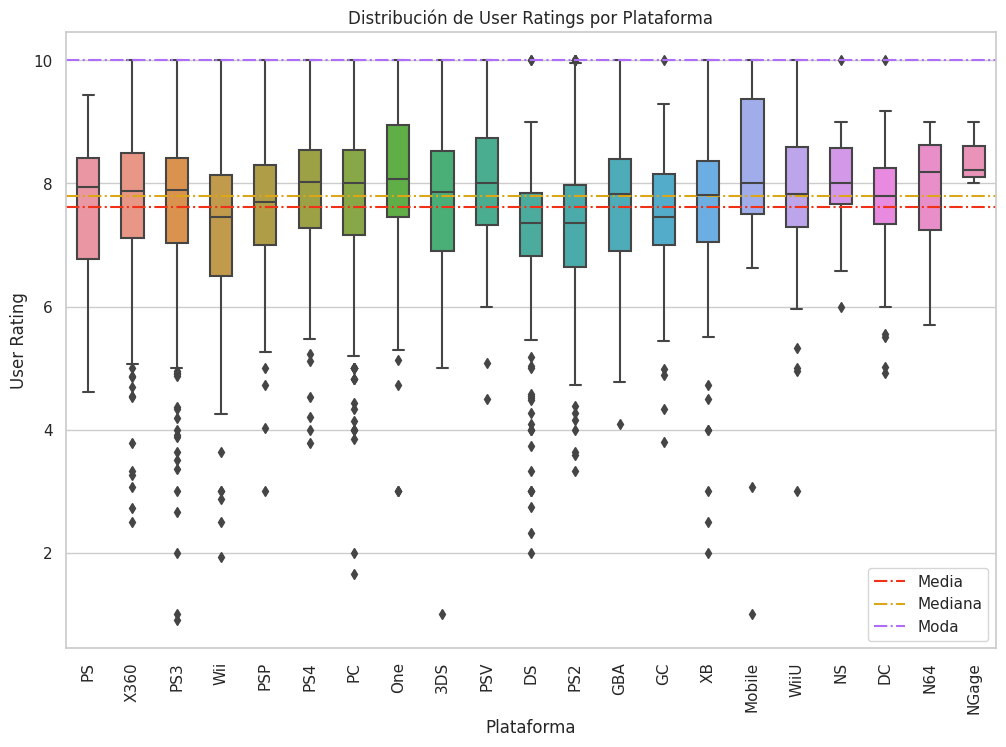

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(x='Platform', y='user_rating', data=vandal, width=0.5)
plt.title('Distribución de User Ratings por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('User Rating')
plt.xticks(rotation=90)

# Agregar líneas para la media, mediana y moda
plt.axhline(y=vandal['user_rating'].mean(), color='#F03118', linestyle='-.', label='Media')
plt.axhline(y=vandal['user_rating'].median(), color='#DBA718', linestyle='-.', label='Mediana')
plt.axhline(y=vandal['user_rating'].mode().iloc[0], color='#AE6EFA', linestyle='-.', label='Moda')

plt.legend()

plt.show()

Vemos la media y la mediana es bastante similar para todas las plataformas, además que la el dato más repetido en la calificación de los usuarios de 10. De esta forma, vamos a continuar filtrando el dataset, solo para aquellos en los que la nota del sitio web Vandal, fue menor a 8.

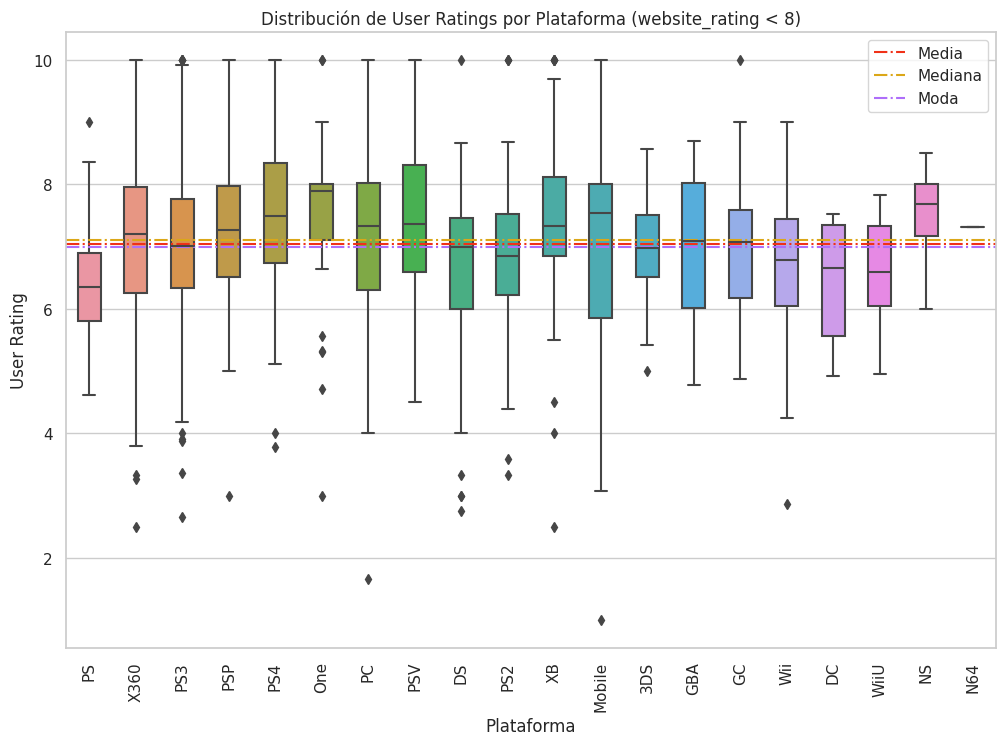

In [ ]:
# Filtrar los datos en 'vandal' donde 'website_rating' es menor a 8
vandal_filtered = vandal[vandal['website_rating'] < 8]

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(x='Platform', y='user_rating', data=vandal_filtered, width=0.5)
plt.title('Distribución de User Ratings por Plataforma (website_rating < 8)')
plt.xlabel('Plataforma')
plt.ylabel('User Rating')
plt.xticks(rotation=90)

# Agregar líneas para la media, mediana y moda
plt.axhline(y=vandal_filtered['user_rating'].mean(), color='#F03118', linestyle='-.', label='Media')
plt.axhline(y=vandal_filtered['user_rating'].median(), color='#DBA718', linestyle='-.', label='Mediana')
plt.axhline(y=vandal_filtered['user_rating'].mode().iloc[0], color='#AE6EFA', linestyle='-.', label='Moda')

plt.legend()

plt.show()

Tanto la moda, mediana y media se redujero drásticamente, aunque vemos como a priori podría existir:
* Distribución norrmal de datos (dado que moda~mediana~media)
* Mayor nivel de dispersión, dado que hay mayor cantidad de outliers
* Mayor desvío estándar

Voy a continuar analizando para las plataformas más populares, con el objetivo de tener un analisis más puntualizado.

<ipython-input-61-04cf6df0f733>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vandal_filtrado = vandal_filtrado[vandal['website_rating'] < 8]


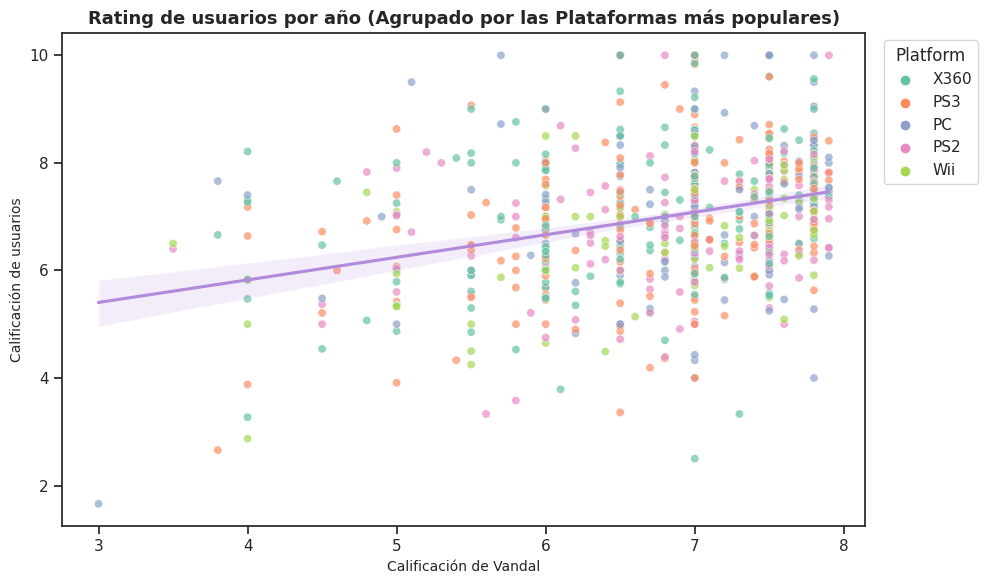

In [ ]:
# Calcular las 5 categorías más repetidas
top_platforms = vandal['Platform'].value_counts().head(5).index

vandal_filtrado = vandal[vandal['Platform'].isin(top_platforms)]
vandal_filtrado = vandal_filtrado[vandal['website_rating'] < 8]

sns.set_theme(style="ticks")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='website_rating',
    y='user_rating',
    hue='Platform',  # Utilizamos la variable 'Platform' para el color
    data=vandal_filtrado,
    palette='Set2',
    alpha=0.7
)

sns.regplot(
    x='website_rating',
    y='user_rating',
    data=vandal_filtrado,
    scatter=False,
    color='#B28ADB'
)

plt.xlabel('Calificación de Vandal', fontsize=10)
plt.ylabel('Calificación de usuarios', fontsize=10)
plt.title('Rating de usuarios por año (Agrupado por las Plataformas más populares)', fontsize=13, fontweight='bold')
plt.legend(title='Platform', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()

Vemos como existe una correlación, pero menos fuerte que al momento de analizar con todos los datos, es decir, sin el filtro. A su vez, la línea de regresión es más plana
A su vez, existe mucha más dispersión, y vmos como ciertas plataformas, por ejemplo PS3, tiene a tener valores por debajo de lo eserado, y como plataformas como PC o Wii, tiende a tener valores por encima de lo esperado.

Continuamos analizando por periodos bianuales

<ipython-input-62-0d7588ef92ed>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vandal_filtrado = vandal_filtrado[vandal['website_rating'] < 8]


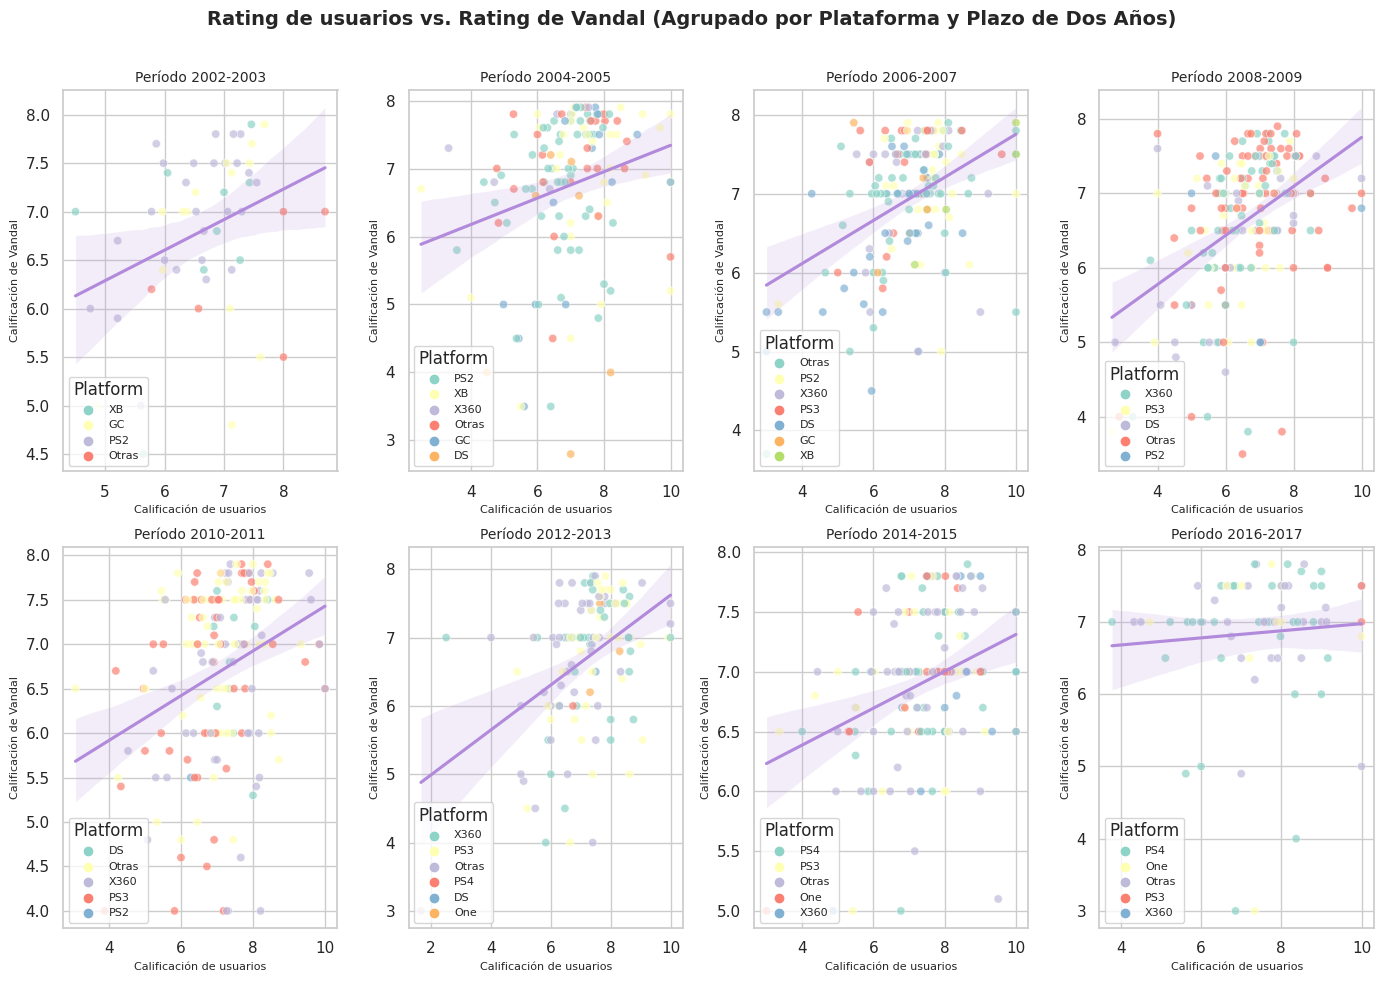

In [ ]:
# Analizamos por periodos de dos años
inicio = 2002
fin = 2016

vandal_filtrado = vandal[(vandal['year'] >= inicio) & (vandal['year'] <= fin)]
vandal_filtrado = vandal_filtrado[vandal['website_rating'] < 8]

# Crear una nueva columna 'Two_Year_Period' para agrupar los datos en plazos de dos años
vandal_filtrado['Two_Year_Period'] = ((vandal['year'] - 2002) // 2) * 2 + 2002

# Obtener las tres plataformas más populares en cada período de dos años
top_platforms_by_period = vandal_filtrado.groupby('Two_Year_Period')['Platform'].value_counts().groupby(level=0, group_keys=False).nlargest(2).reset_index(name='Count')
top_platforms_list = top_platforms_by_period['Platform'].unique()

# Reemplazar las demás plataformas con 'Otras' si no están en la lista de las tres principales
vandal_filtrado['Platform'] = vandal_filtrado['Platform'].apply(lambda x: x if x in top_platforms_list else 'Otras')

plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")
two_year_periods = sorted(vandal_filtrado['Two_Year_Period'].unique())

for i, period in enumerate(two_year_periods, start=1):
    plt.subplot(2, 4, i)
    plt.title(f'Período {period}-{period+1}', fontsize=10)
    period_data = vandal_filtrado[vandal_filtrado['Two_Year_Period'] == period]

    sns.scatterplot(
        x=period_data['user_rating'],
        y=period_data['website_rating'],
        hue=period_data['Platform'],
        palette='Set3',
        alpha=0.7
    )

    sns.regplot(
        x=period_data['user_rating'],
        y=period_data['website_rating'],
        scatter=False,
        color='#B28ADB'
    )

    plt.xlabel('Calificación de usuarios', fontsize=8)
    plt.ylabel('Calificación de Vandal', fontsize=8)

    if i > 0:
        plt.legend(title='Platform', loc='lower left', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('Rating de usuarios vs. Rating de Vandal (Agrupado por Plataforma y Plazo de Dos Años)', fontsize=14, fontweight='bold')
plt.show()

Vemos como se puede ir confirmando lo pensado en el punto anterior, es decir, que en el transcurso de los años, la curva se fue aplanando, generando dos insights interesantes:
* El eje Y levemente va bajando, mistrando como se va acomodando cada vez más en puntajes en torno al 7.
* La curva se va aplanando, por lo que puede ocurrir que en los últimos años haya tenido menos incidencia la voz de Vandal.

In [ ]:
# Modelo de regresión lineal para la relación entre valoraciones y ventas globales
model_platform = 'user_rating ~ website_rating + Platform + year'
lm_global = smf.ols(formula=model_platform, data=vandal).fit()
print("Relación entre valoraciones y ventas globales:")
print(lm_global.summary())

Relación entre valoraciones y ventas globales:
                            OLS Regression Results                            
Dep. Variable:            user_rating   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     68.84
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          1.25e-238
Time:                        12:45:03   Log-Likelihood:                -4240.4
No. Observations:                3106   AIC:                             8525.
Df Residuals:                    3084   BIC:                             8658.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [ ]:
# H0: No hay diferencia significativa entre las calificaciones de Vandal y las calificaciones de usuarios en un período de dos años para todas las plataformas
top_platforms = vandal['Platform'].value_counts().head(5).index
alfa = 0.05

inicio = 2000
fin = 2016
vandal_filtrado = vandal[(vandal['year'] >= inicio) & (vandal['year'] <= fin)]

for plataforma in top_platforms:
    plataforma_data = vandal_filtrado[vandal_filtrado['Platform'] == plataforma]
    website_rating = plataforma_data['website_rating']
    user_rating = plataforma_data['user_rating']
    T, p = stats.ttest_ind(website_rating, user_rating)
    if p < alfa:
        print(f"Rechazamos la hipótesis nula en {plataforma}")
    else:
        print(f"No rechazamos la hipótesis nula en {plataforma}")

No rechazamos la hipótesis nula en PC
No rechazamos la hipótesis nula en PS3
No rechazamos la hipótesis nula en X360
No rechazamos la hipótesis nula en PS2
No rechazamos la hipótesis nula en Wii


# **Conclusión:**

Estamos en condiciones de confirmar, con un 95% de confianza, que para las 5 consolas que mayor nivel de análisis tuvieron y fuero nlas más populares, que no existe una diferencia significativa entre las valoraciones de los usuarios y las valoraciones de Vandal, por ende, no podemos afirmar que la tracción de una plataforma sea lo suficiente como para alterar el puntaje de los usuarios.

Debemos continuar el análisis, buscando la calificación del mismo título en diferentes consolas.


